In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [64]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [66]:
df.shape

(1599, 12)

In [67]:
corr = df.corr()

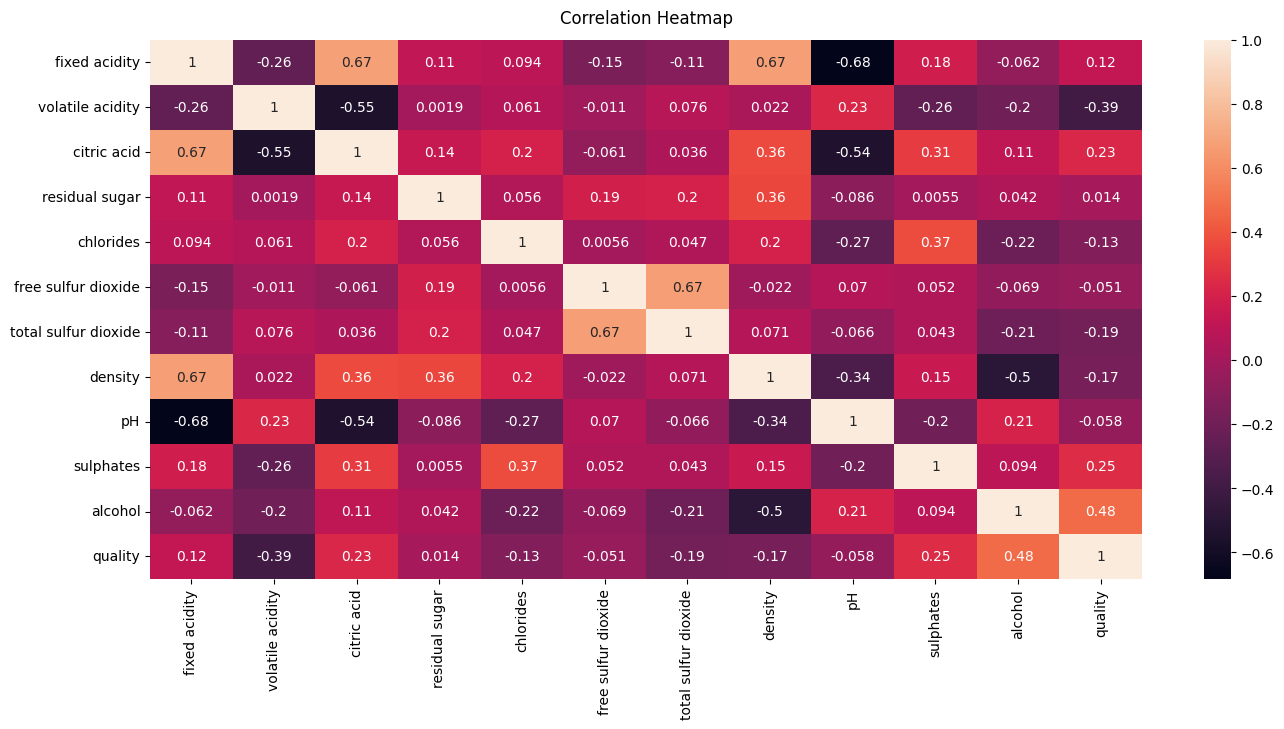

In [70]:
plt.figure(figsize=(16, 7))
h_map = sns.heatmap(corr,annot=True)
h_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [69]:
df.drop(columns={"residual sugar","free sulfur dioxide","pH"},inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [86]:
X = df.drop(columns={"quality"})
y =df["quality"]

In [87]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [88]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [89]:
k_fold = KFold(n_splits=7,shuffle=True,random_state=50)

In [142]:
errors = []

In [143]:
for k, (train_idx,test_idx) in enumerate(k_fold.split(X)):
  X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  print(f"K value: {k+1}")
  print(f"Train samples : {X_train.shape[0]}")
  print(f"Test samples : {X_test.shape[0]}")

  model = LinearRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test,y_pred)

  errors.append(mse)

  mae = mean_absolute_error(y_test,y_pred)
  
  print(f"Mean Squared Error: {mse}")
  print(f"Mean Absolute Error: {mae}")

K value: 1
Train samples : 1370
Test samples : 229
Mean Squared Error: 0.40330024225514843
Mean Absolute Error: 0.5091864368269973
K value: 2
Train samples : 1370
Test samples : 229
Mean Squared Error: 0.4221509666613016
Mean Absolute Error: 0.5077107462749897
K value: 3
Train samples : 1370
Test samples : 229
Mean Squared Error: 0.45764926649748977
Mean Absolute Error: 0.5223155990143336
K value: 4
Train samples : 1371
Test samples : 228
Mean Squared Error: 0.4380744201840379
Mean Absolute Error: 0.5115123980388769
K value: 5
Train samples : 1371
Test samples : 228
Mean Squared Error: 0.3650152617032589
Mean Absolute Error: 0.4702759697079559
K value: 6
Train samples : 1371
Test samples : 228
Mean Squared Error: 0.455892846992452
Mean Absolute Error: 0.5184420468891893
K value: 7
Train samples : 1371
Test samples : 228
Mean Squared Error: 0.43780398232698164
Mean Absolute Error: 0.5150391199924695


In [145]:
avg_mse = sum(errors) / len(errors)
print(f"Average mean squared error is {avg_mse}")

Average mean squared error is 0.4256981409458101


<Figure size 800x500 with 0 Axes>

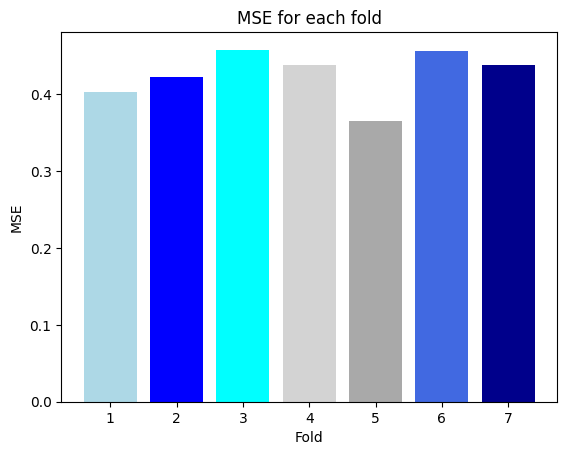

In [178]:
plt.figure(figsize=(8,5))
fig , ax = plt.subplots()
color = ['lightblue', 'blue', 'Cyan', 'lightgrey',"darkgrey","royalblue","darkblue"]
ax.bar(range(1,len(errors)+1),errors,color=color)
ax.set_xlabel("Fold")
ax.set_ylabel("MSE")
ax.set_title("MSE for each fold")
plt.show()